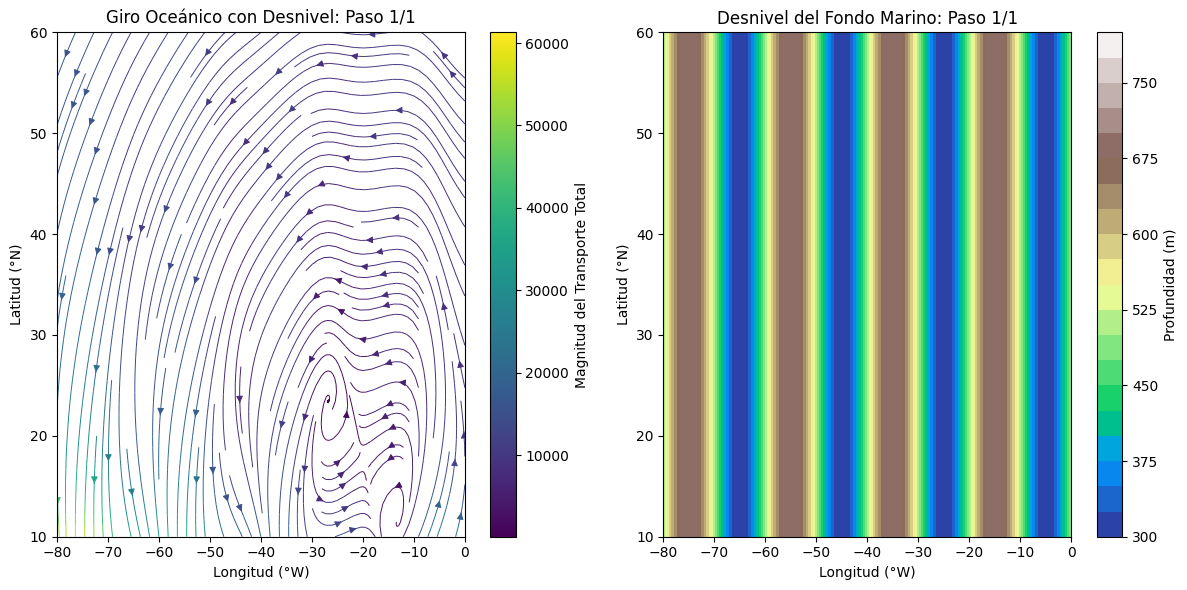

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
rho = 1025  
Omega = 7.2921e-5  
P0 = 1e3  
model = "linear"  
lat_scale = 35
lon_scale = 40
latitudes = np.linspace(10, 60, 200)
longitudes = np.linspace(-80, 0, 200)
Longitudes, Latitudes = np.meshgrid(longitudes, latitudes)

# Desnivel del fondo
def bottom_topography(Longitudes, Latitudes):
    return 500 + 200 * np.sin(2 * np.pi * Longitudes / 20)

Depth = bottom_topography(Longitudes, Latitudes) 

def calculate_pressure_gradient(Longitudes, Latitudes, P0, model, lat_scale=40, lon_scale=20): 
    if model == "exponential":
        grad_P_y = -P0 * np.exp(-(Latitudes - lat_scale) / lat_scale)
        grad_P_x = P0 * np.exp(-(Longitudes + lon_scale) / lon_scale)
    elif model == "linear":
        grad_P_y = -P0 * (Latitudes - lat_scale) / lat_scale
        grad_P_x = P0 * (Longitudes + lon_scale) / lon_scale
    elif model == "sinusoidal":
        grad_P_y = -P0 * np.sin(np.deg2rad(Latitudes / lat_scale))
        grad_P_x = P0 * np.cos(np.deg2rad(Longitudes / lon_scale))
    else:
        raise ValueError(f"Modelo de presión '{model}' no reconocido.")
    
    return grad_P_x, grad_P_y

# Frecuencia de Coriolis
f = 2 * Omega * np.sin(np.deg2rad(Latitudes))

# Viento 
U = -10 * np.ones(Longitudes.shape)  
V = np.zeros(Longitudes.shape)

# Esfuerzo del viento
Cd = 1.2e-3 
tau_x = Cd * U**2 * np.sign(U)
tau_y = Cd * V**2 * np.sign(V)

steps = 1  
for step in range(steps):
   
    Q_x_ekman = tau_y / (f * rho)
    Q_y_ekman = -tau_x / (f * rho)

    
    grad_P_x, grad_P_y = calculate_pressure_gradient(Longitudes, Latitudes, P0, model=model, 
                                                      lat_scale=lat_scale, lon_scale=lon_scale)
    
    grad_P_x += -Depth  
    grad_P_y += -Depth   

    
    Q_x_pressure = grad_P_y / (rho * f)
    Q_y_pressure = grad_P_x / (rho * f)

    
    Q_x_total = Q_x_ekman + Q_x_pressure
    Q_y_total = Q_y_ekman + Q_y_pressure

    
    plt.figure(figsize=(18, 6))

    
    plt.subplot(1, 3, 1)
    speed = np.sqrt(Q_x_total**2 + Q_y_total**2)  
    plt.streamplot(Longitudes, Latitudes, Q_x_total, Q_y_total, color=speed,
                   cmap="viridis", density=1.5, linewidth=0.7, arrowsize=1)
    plt.colorbar(label="Magnitud del Transporte Total")
    plt.title(f"Giro Oceánico con Desnivel: Paso {step+1}/{steps}")
    plt.xlabel("Longitud (°W)")
    plt.ylabel("Latitud (°N)")

    plt.subplot(1, 3, 2)
    depth_plot = plt.contourf(Longitudes, Latitudes, Depth, levels=np.linspace(300, 800, 21), cmap="terrain")
    plt.colorbar(depth_plot, label="Profundidad (m)")
    plt.title(f"Desnivel del Fondo Marino: Paso {step+1}/{steps}")
    plt.xlabel("Longitud (°W)")
    plt.ylabel("Latitud (°N)")

    plt.tight_layout()
    plt.show()


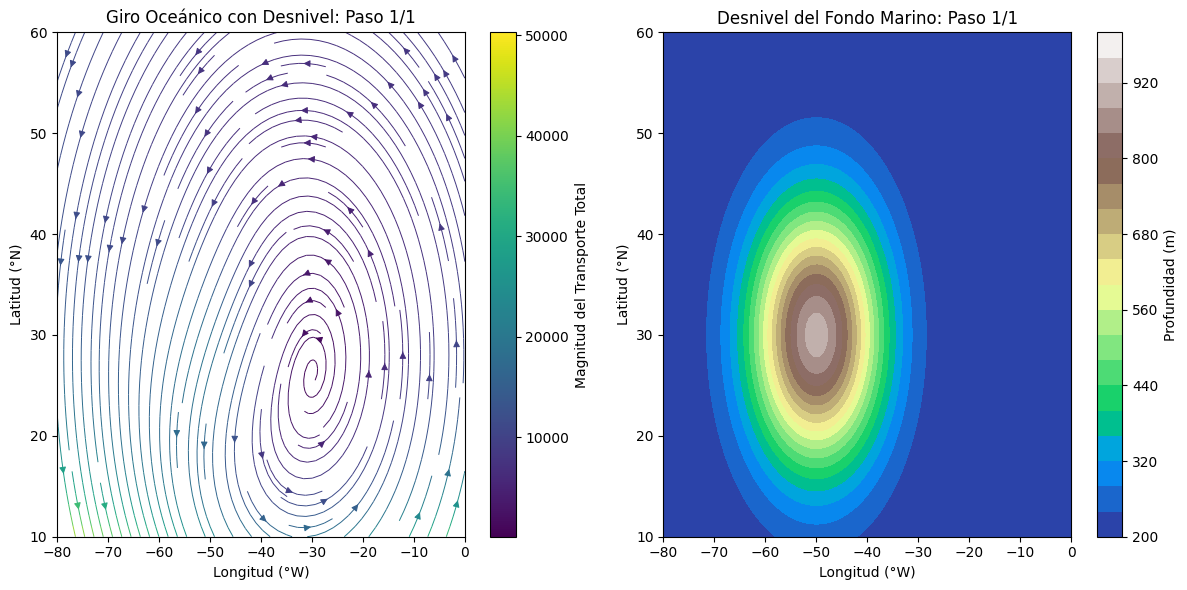

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
rho = 1025 
Omega = 7.2921e-5 
P0 = 1e3 
model = "linear" 
lat_scale = 35
lon_scale = 40
latitudes = np.linspace(10, 60, 200)
longitudes = np.linspace(-80, 0, 200)
Longitudes, Latitudes = np.meshgrid(longitudes, latitudes)

# Desnivel del fondo 
def bottom_topography(Longitudes, Latitudes):
    x0, y0 = -50, 30 
    sigma = 9  
    return 200 + 700 * np.exp(-((Longitudes - x0)**2 + (Latitudes - y0)**2) / (2 * sigma**2)) 

Depth = bottom_topography(Longitudes, Latitudes)  

def calculate_pressure_gradient(Longitudes, Latitudes, P0, model, lat_scale=40, lon_scale=20): 
    if model == "exponential":
        grad_P_y = -P0 * np.exp(-(Latitudes - lat_scale) / lat_scale)
        grad_P_x = P0 * np.exp(-(Longitudes + lon_scale) / lon_scale)
    elif model == "linear":
        grad_P_y = -P0 * (Latitudes - lat_scale) / lat_scale
        grad_P_x = P0 * (Longitudes + lon_scale) / lon_scale
    elif model == "sinusoidal":
        grad_P_y = -P0 * np.sin(np.deg2rad(Latitudes / lat_scale))
        grad_P_x = P0 * np.cos(np.deg2rad(Longitudes / lon_scale))
    else:
        raise ValueError(f"Modelo de presión '{model}' no reconocido.")
    
    return grad_P_x, grad_P_y

# Frecuencia de Coriolis
f = 2 * Omega * np.sin(np.deg2rad(Latitudes))

# Viento
U = -10 * np.ones(Longitudes.shape)  
V = np.zeros(Longitudes.shape)

# Esfuerzo del viento
Cd = 1.2e-3  
tau_x = Cd * U**2 * np.sign(U)
tau_y = Cd * V**2 * np.sign(V)

steps = 1  
for step in range(steps):
    
    Q_x_ekman = tau_y / (f * rho)
    Q_y_ekman = -tau_x / (f * rho)

    
    grad_P_x, grad_P_y = calculate_pressure_gradient(Longitudes, Latitudes, P0, model=model, 
                                                      lat_scale=lat_scale, lon_scale=lon_scale)
    
    grad_P_x += -Depth  
    grad_P_y += -Depth   

    Q_x_pressure = grad_P_y / (rho * f)
    Q_y_pressure = grad_P_x / (rho * f)

    Q_x_total = Q_x_ekman + Q_x_pressure
    Q_y_total = Q_y_ekman + Q_y_pressure

    
    plt.figure(figsize=(18, 6))

    
    plt.subplot(1, 3, 1)
    speed = np.sqrt(Q_x_total**2 + Q_y_total**2)  
    plt.streamplot(Longitudes, Latitudes, Q_x_total, Q_y_total, color=speed,
                   cmap="viridis", density=1.5, linewidth=0.7, arrowsize=1)
    plt.colorbar(label="Magnitud del Transporte Total")
    plt.title(f"Giro Oceánico con Desnivel: Paso {step+1}/{steps}")
    plt.xlabel("Longitud (°W)")
    plt.ylabel("Latitud (°N)")


    plt.subplot(1, 3, 2)
    depth_plot = plt.contourf(Longitudes, Latitudes, Depth, levels=np.linspace(200, 1000, 21), cmap="terrain")
    plt.colorbar(depth_plot, label="Profundidad (m)")
    plt.title(f"Desnivel del Fondo Marino: Paso {step+1}/{steps}")
    plt.xlabel("Longitud (°W)")
    plt.ylabel("Latitud (°N)")

    plt.tight_layout()
    plt.show()


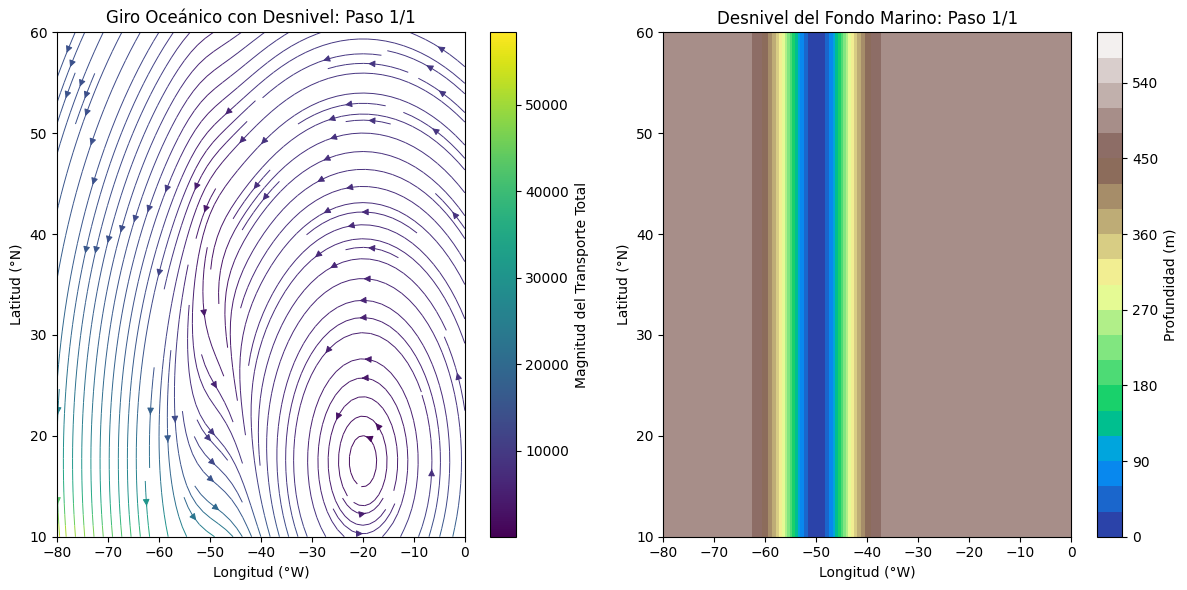

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
rho = 1025  
Omega = 7.2921e-5  
P0 = 1e3  
model = "linear"  
lat_scale = 35
lon_scale = 40
latitudes = np.linspace(10, 60, 200)
longitudes = np.linspace(-80, 0, 200)
Longitudes, Latitudes = np.meshgrid(longitudes, latitudes)

# Desnivel del fondo
def bottom_topography(Longitudes, Latitudes):
    x0, y0 = -50, 30  
    width = 5 
    Depth = 500 * np.ones_like(Longitudes) 
    Depth -= 500 * np.exp(-((Longitudes - x0)**2) / (2 * width**2))  
    return Depth

Depth = bottom_topography(Longitudes, Latitudes)

def calculate_pressure_gradient(Longitudes, Latitudes, P0, model, lat_scale=40, lon_scale=20): 
    if model == "exponential":
        grad_P_y = -P0 * np.exp(-(Latitudes - lat_scale) / lat_scale)
        grad_P_x = P0 * np.exp(-(Longitudes + lon_scale) / lon_scale)
    elif model == "linear":
        grad_P_y = -P0 * (Latitudes - lat_scale) / lat_scale
        grad_P_x = P0 * (Longitudes + lon_scale) / lon_scale
    elif model == "sinusoidal":
        grad_P_y = -P0 * np.sin(np.deg2rad(Latitudes / lat_scale))
        grad_P_x = P0 * np.cos(np.deg2rad(Longitudes / lon_scale))
    else:
        raise ValueError(f"Modelo de presión '{model}' no reconocido.")
    
    return grad_P_x, grad_P_y

# Frecuencia de Coriolis
f = 2 * Omega * np.sin(np.deg2rad(Latitudes))

# Viento
U = -10 * np.ones(Longitudes.shape)  
V = np.zeros(Longitudes.shape)

# Esfuerzo del viento
Cd = 1.2e-3  
tau_x = Cd * U**2 * np.sign(U)
tau_y = Cd * V**2 * np.sign(V)

steps = 1  
for step in range(steps):
    
    Q_x_ekman = tau_y / (f * rho)
    Q_y_ekman = -tau_x / (f * rho)

    
    grad_P_x, grad_P_y = calculate_pressure_gradient(Longitudes, Latitudes, P0, model=model, 
                                                      lat_scale=lat_scale, lon_scale=lon_scale)
    
    grad_P_x += -Depth  
    grad_P_y += -Depth   

    Q_x_pressure = grad_P_y / (rho * f)
    Q_y_pressure = grad_P_x / (rho * f)

    Q_x_total = Q_x_ekman + Q_x_pressure
    Q_y_total = Q_y_ekman + Q_y_pressure

    
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    speed = np.sqrt(Q_x_total**2 + Q_y_total**2)  
    plt.streamplot(Longitudes, Latitudes, Q_x_total, Q_y_total, color=speed,
                   cmap="viridis", density=1.5, linewidth=0.7, arrowsize=1)
    plt.colorbar(label="Magnitud del Transporte Total")
    plt.title(f"Giro Oceánico con Desnivel: Paso {step+1}/{steps}")
    plt.xlabel("Longitud (°W)")
    plt.ylabel("Latitud (°N)")


    
    plt.subplot(1, 3, 2)
    depth_plot = plt.contourf(Longitudes, Latitudes, Depth, levels=np.linspace(0, 600, 21), cmap="terrain")
    plt.colorbar(depth_plot, label="Profundidad (m)")
    plt.title(f"Desnivel del Fondo Marino: Paso {step+1}/{steps}")
    plt.xlabel("Longitud (°W)")
    plt.ylabel("Latitud (°N)")

    plt.tight_layout()
    plt.show()
